<a href="https://colab.research.google.com/github/Anshad-Aziz/Abalone-Age-Prediction-Project/blob/main/Abalone_Age_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import os
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler


from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [3]:
df=pd.read_csv('/content/abalone.csv')

In [4]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [7]:
df.columns=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [9]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

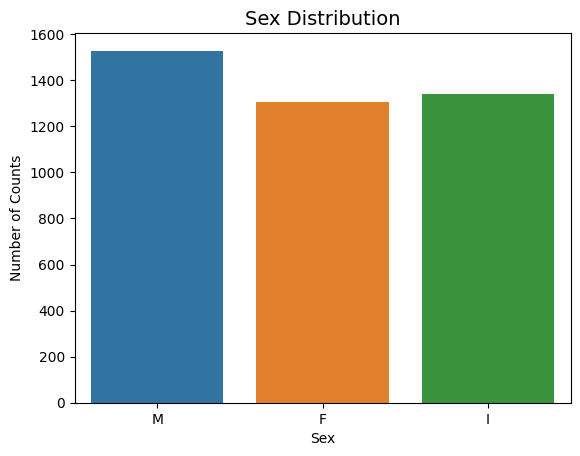

In [10]:
sns.countplot(x=df['Sex'])
plt.title('Sex Distribution',fontsize=14)
plt.xlabel('Sex')
plt.ylabel('Number of Counts')
plt.show()

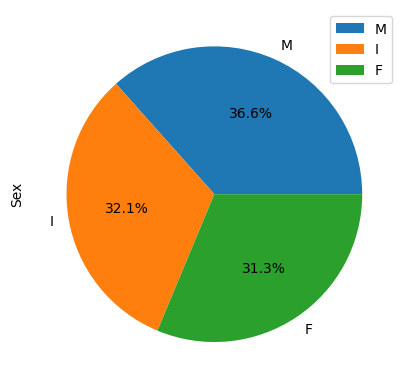

In [11]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.legend()
plt.show()

In [12]:
d = pd.DataFrame(columns=['Minimum','Maximum','Mean','Median','Mode','Standard_Deviation','Variance','25%_Quantile','75%_Quantile'],
                index=['Length'])

In [13]:
for col in df.columns:
    if df[col].dtype==object:
        pass
    else:
        min1 = df[col].min()
        max1 = df[col].max()
        mean = df[col].mean()
        median = df[col].mean()
        mode = df[col].mean()
        std = df[col].std()
        var = df[col].var()
        q_25 = df[col].quantile(0.25)
        q_75 = df[col].quantile(0.75)
        d.loc[col] = [min1,max1,mean,median, mode, std, var, q_25,q_75]

In [14]:
d


,Minimum,Maximum,Mean,Median,Mode,Standard_Deviation,Variance,25%_Quantile,75%_Quantile
Length,0.075,0.815,0.523992,0.523992,0.523992,0.120093,0.014422,0.45,0.615
Diameter,0.055,0.65,0.407881,0.407881,0.407881,0.09924,0.009849,0.35,0.48
Height,0.0,1.13,0.139516,0.139516,0.139516,0.041827,0.00175,0.115,0.165
Whole weight,0.002,2.8255,0.828742,0.828742,0.828742,0.490389,0.240481,0.4415,1.153
Shucked weight,0.001,1.488,0.359367,0.359367,0.359367,0.221963,0.049268,0.186,0.502
Viscera weight,0.0005,0.76,0.180594,0.180594,0.180594,0.109614,0.012015,0.0935,0.253
Shell weight,0.0015,1.005,0.238831,0.238831,0.238831,0.139203,0.019377,0.13,0.329
Rings,1.0,29.0,9.933684,9.933684,9.933684,3.224169,10.395266,8.0,11.0


In [16]:
df['Length'].describe()

count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

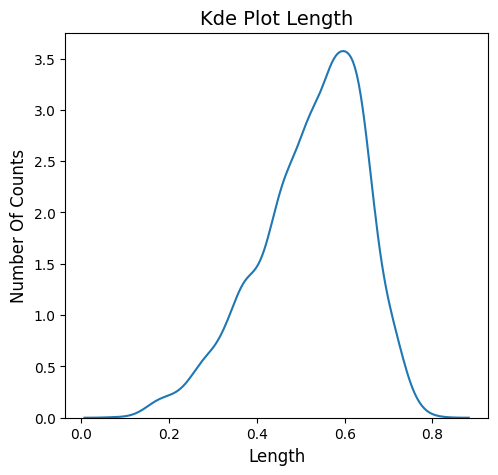

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Length'])    # Longest shell measurement
plt.title("Kde Plot Length",fontsize=14)
plt.xlabel('Length',fontsize=12)
plt.ylabel('Number Of Counts',fontsize=12)
plt.show()

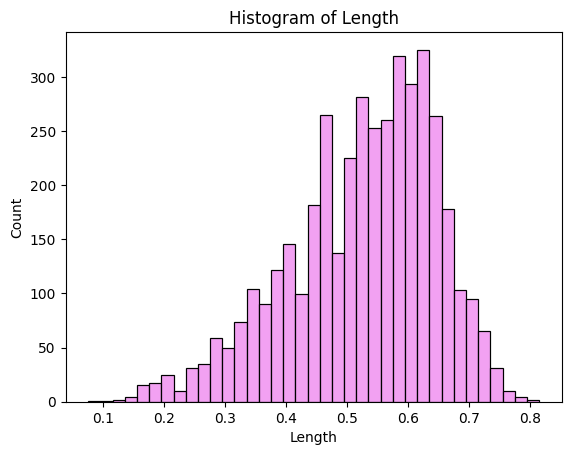

In [20]:
sns.histplot(x=df['Length'],color='Violet')
plt.title("Histogram of Length")
plt.show()

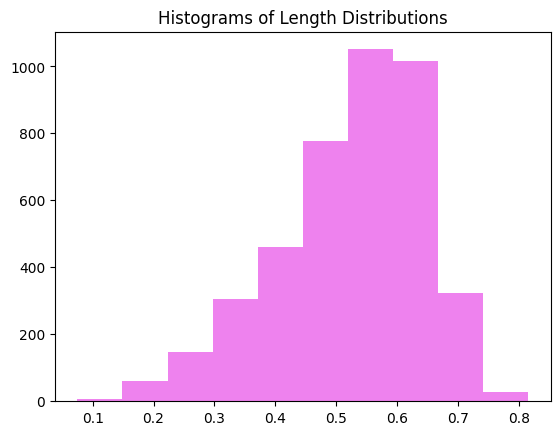

In [21]:
plt.hist(df['Length'],color='Violet')
plt.title("Histograms of Length Distributions")
plt.show()

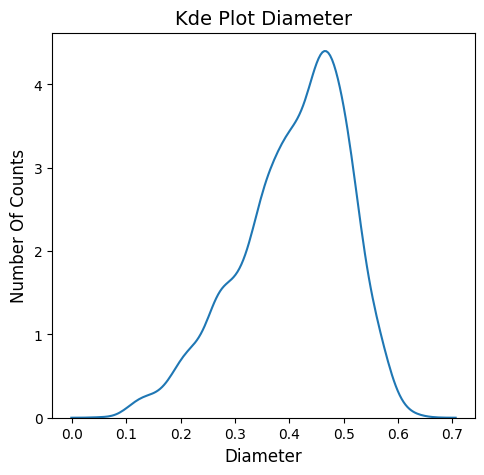

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Diameter'])
plt.title("Kde Plot Diameter",fontsize=14)
plt.xlabel('Diameter',fontsize=12)
plt.ylabel('Number Of Counts',fontsize=12)
plt.show()

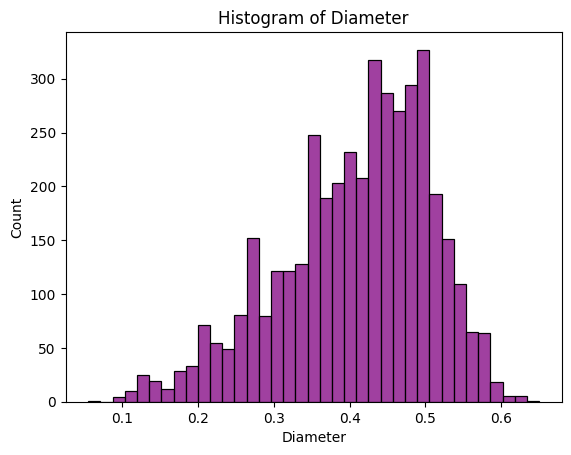

In [23]:
sns.histplot(x=df['Diameter'],color='Purple')
plt.title("Histogram of Diameter")
plt.show()

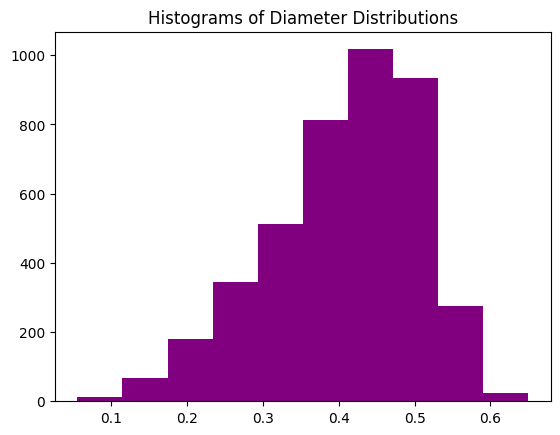

In [24]:
plt.hist(df['Diameter'],color='Purple')
plt.title("Histograms of Diameter Distributions")
plt.show()

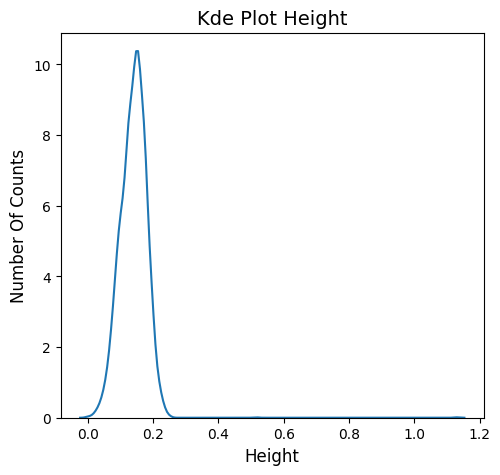

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Height'])
plt.title("Kde Plot Height",fontsize=14)
plt.xlabel('Height',fontsize=12)
plt.ylabel('Number Of Counts',fontsize=12)
plt.show()

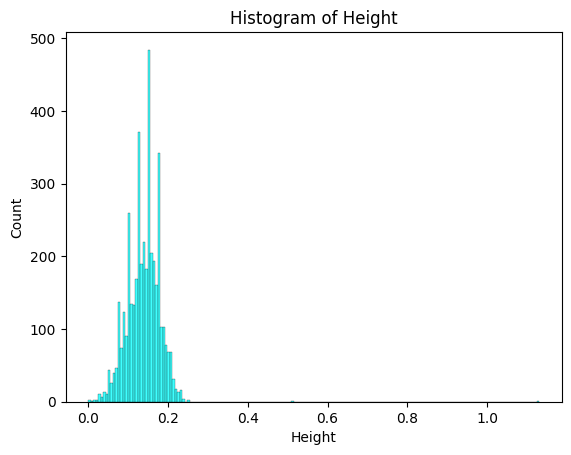

In [26]:
sns.histplot(x=df['Height'],color='Cyan')
plt.title("Histogram of Height")
plt.show()

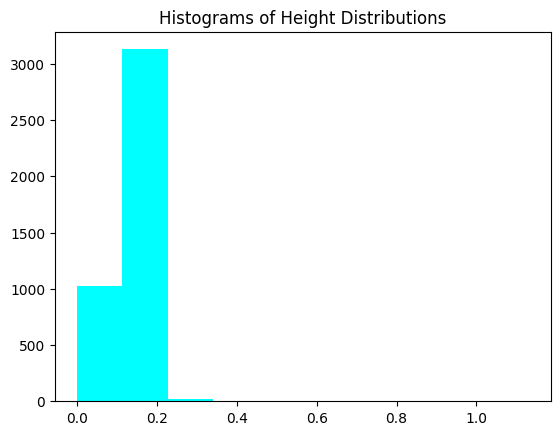

In [27]:
plt.hist(df['Height'],color='Cyan')
plt.title("Histograms of Height Distributions")
plt.show()

In [28]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [29]:
df['Sex']=df['Sex'].replace({'F':0,'M':1,'I':2})

In [30]:
df['Sex'].unique()

array([1, 0, 2])

In [31]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [32]:
cor=df.corr()
cor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
Length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


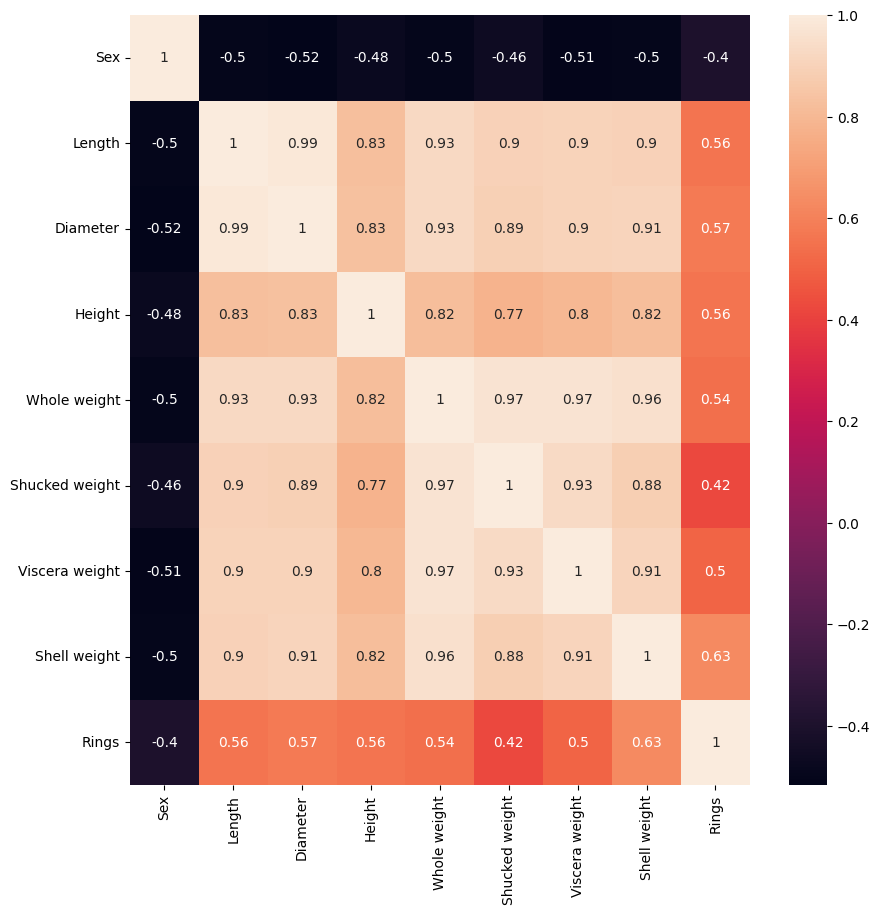

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)
plt.show()

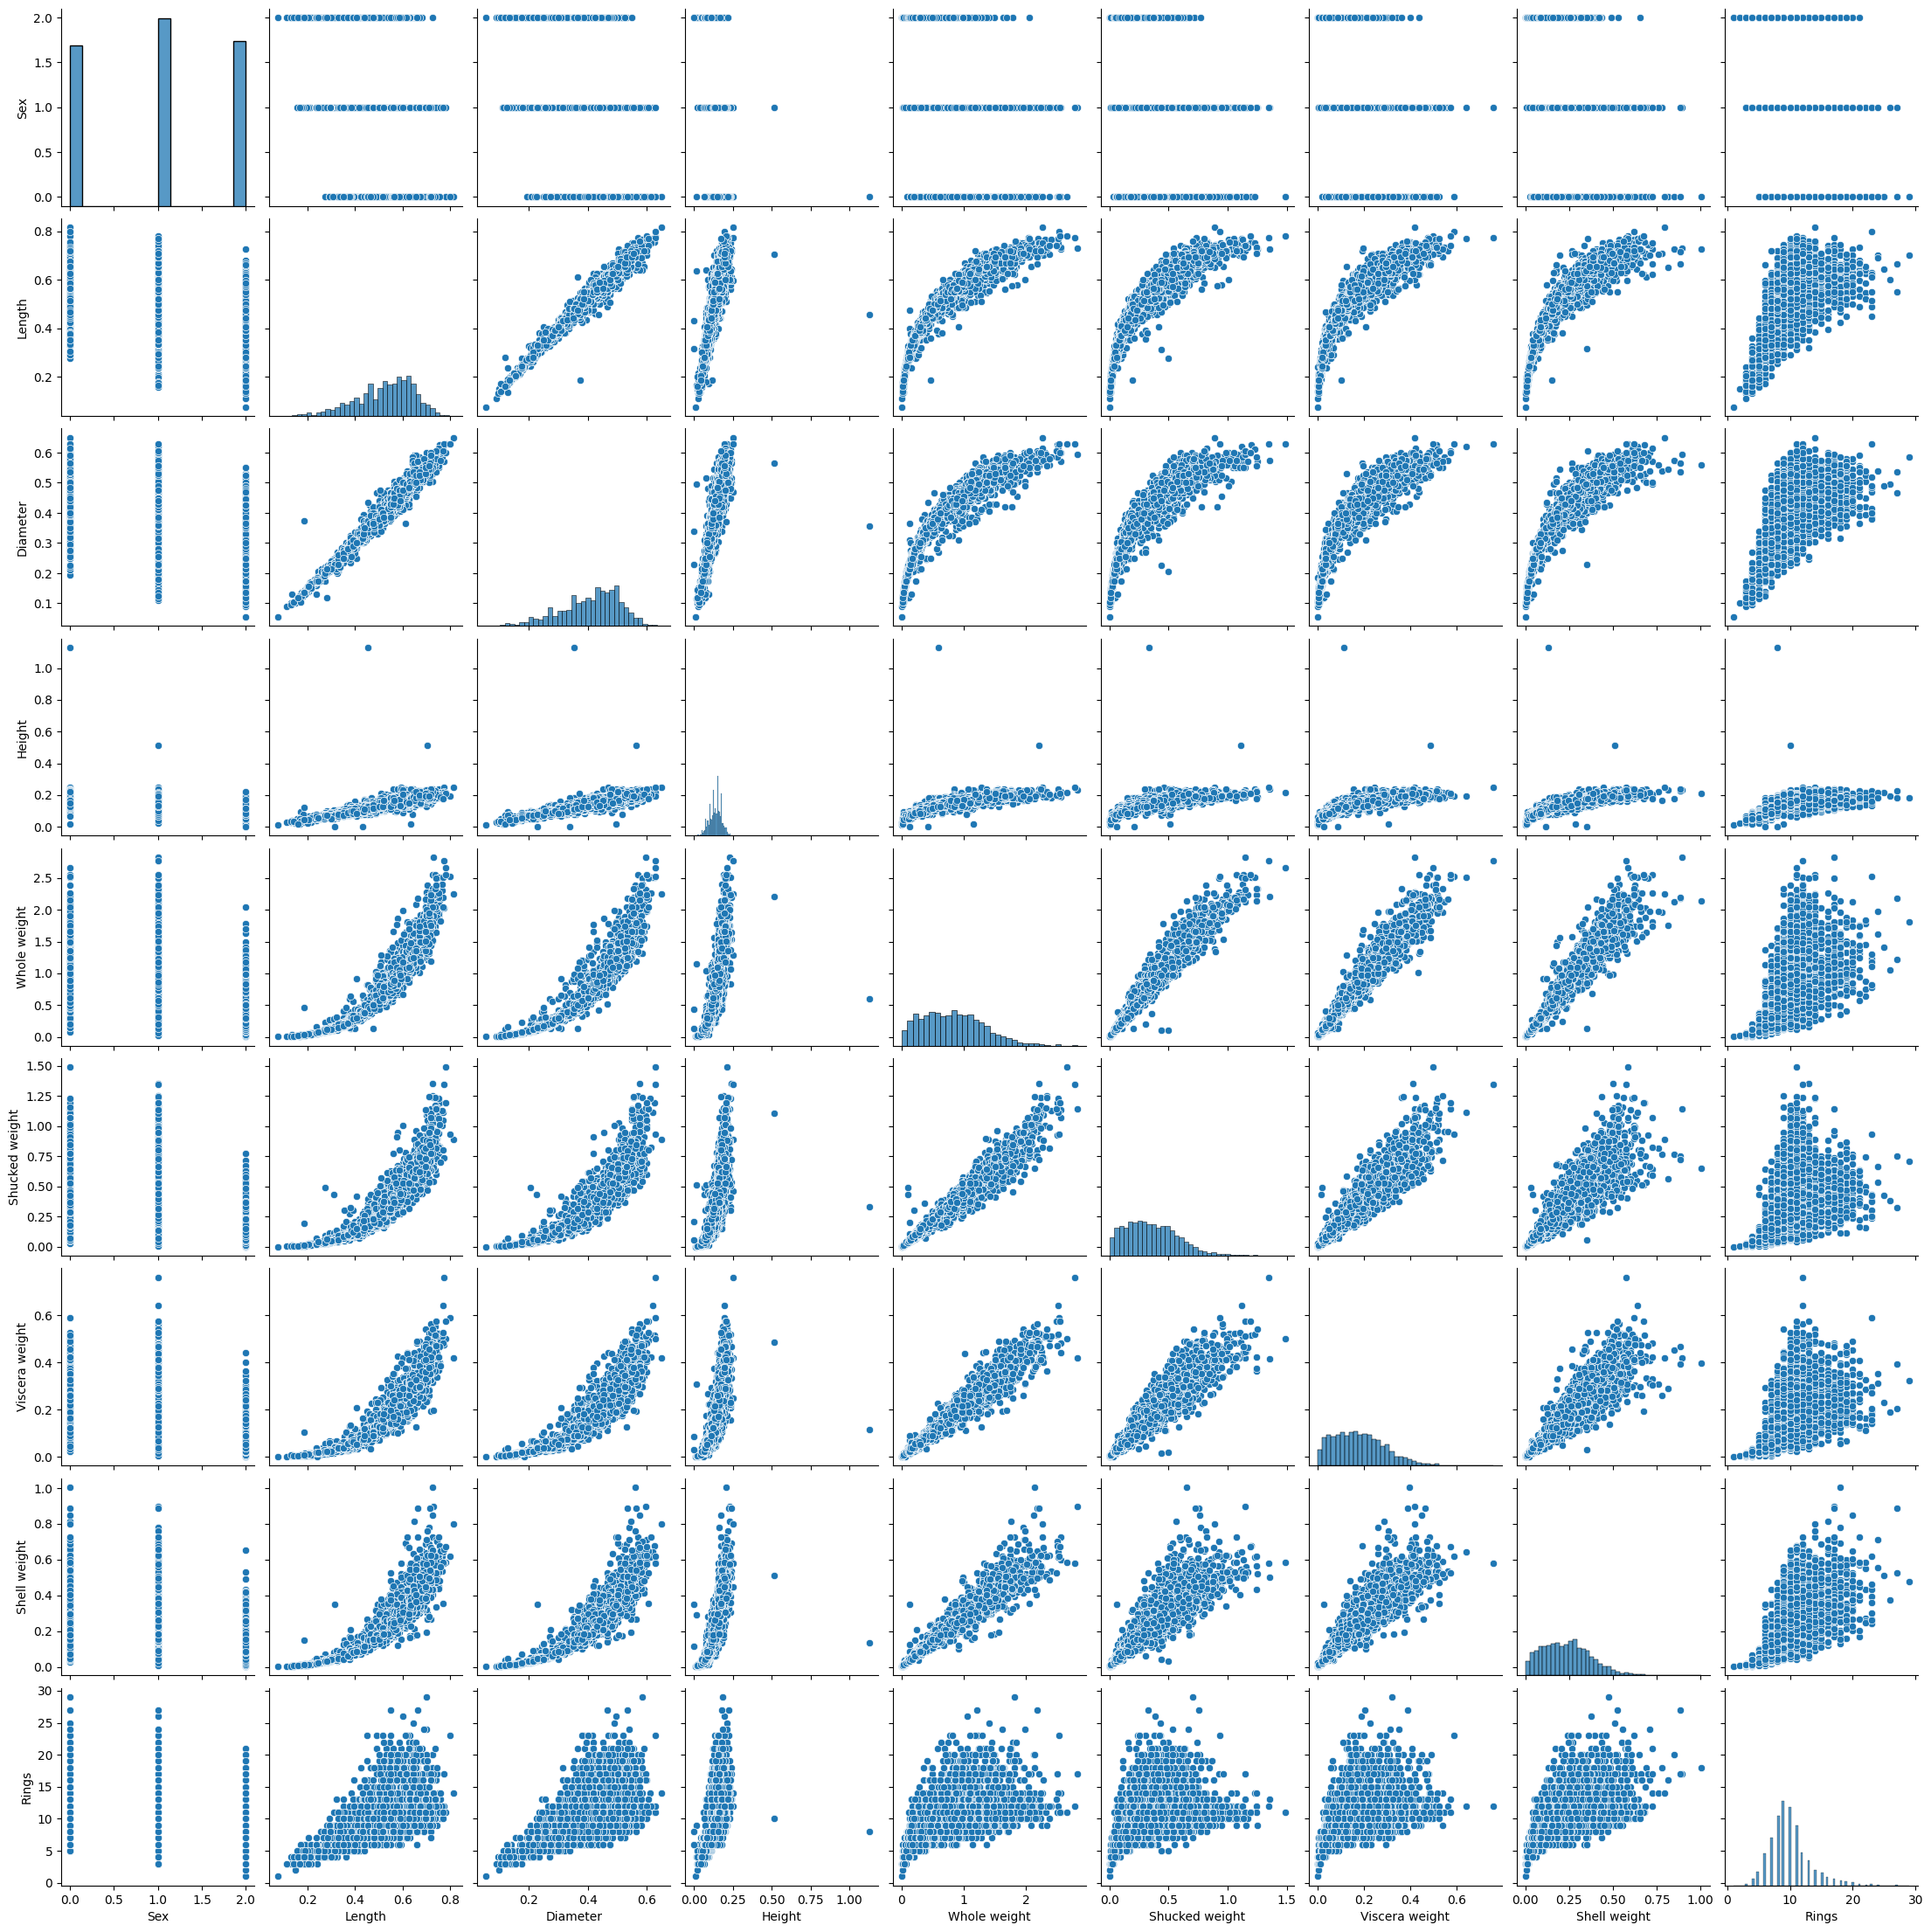

In [34]:
sns.pairplot(df);

In [35]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


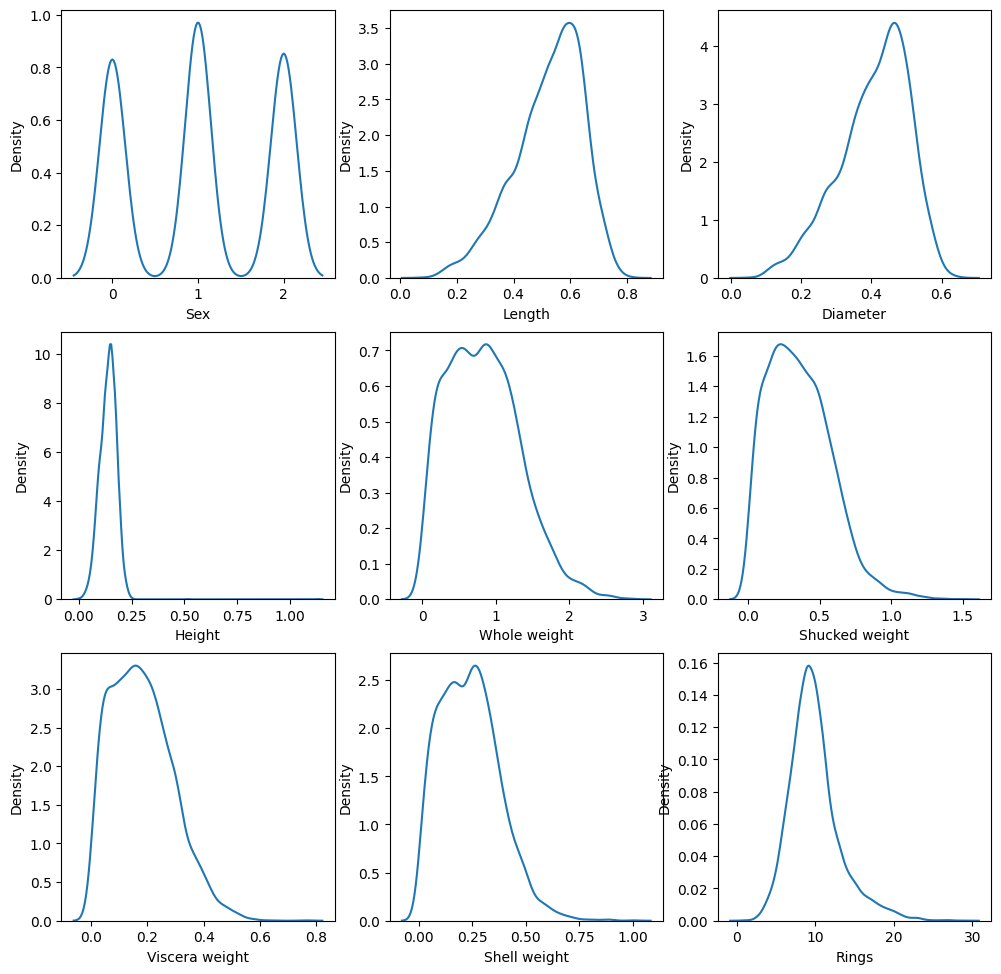

In [36]:
plt.figure(figsize=(12,16))
i=1
for col in df.columns:
    plt.subplot(4,3,i)
    sns.kdeplot(df[col])
    i+=1

In [37]:
df.skew()

Sex              -0.014980
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

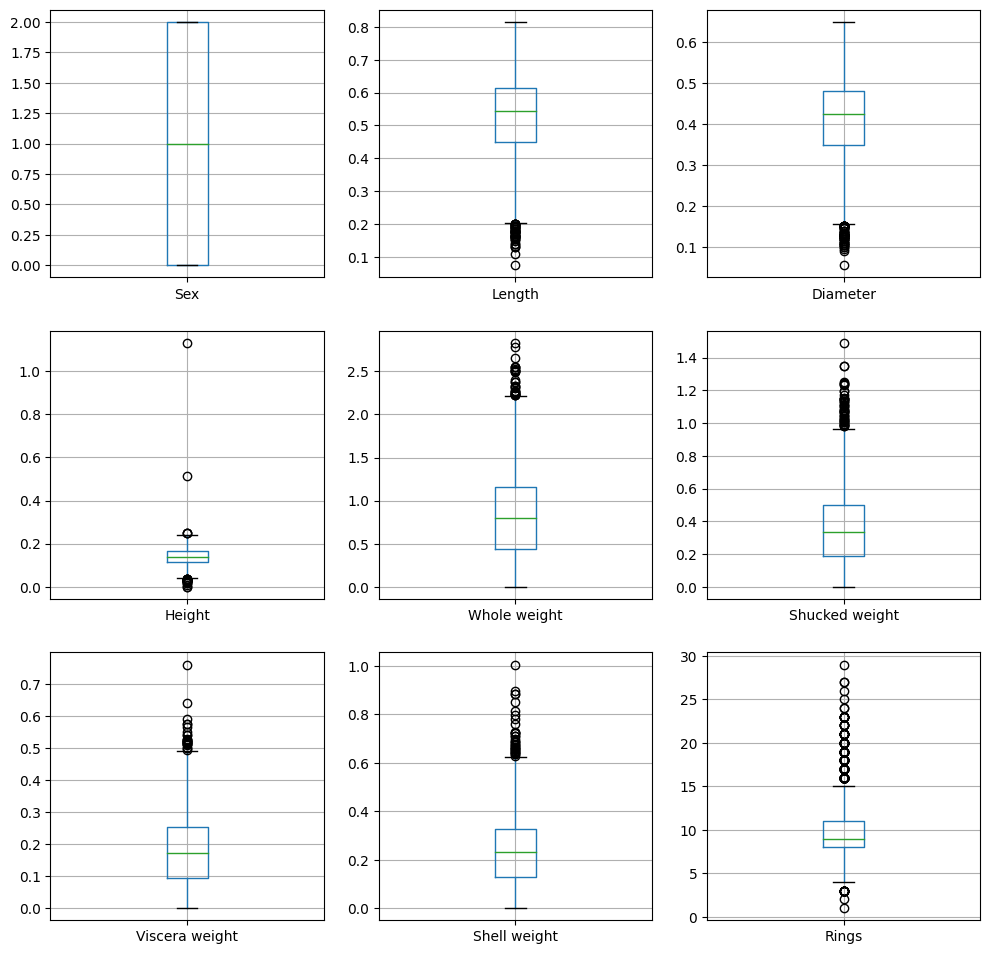

In [38]:
plt.figure(figsize=(12,16))
i=1
for col in df.columns:
    plt.subplot(4,3,i)
    df[[col]].boxplot()
    i+=1

In [39]:
x = df.drop('Rings',axis=1)
y = df['Rings']

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.02,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4093, 8)
(84, 8)
(4093,)
(84,)


In [41]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [42]:
x_train_scaled = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
x_train_scaled

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.5,0.682432,0.630252,0.115044,0.281920,0.244788,0.227123,0.226208
1,0.5,0.695946,0.689076,0.123894,0.369754,0.315064,0.345622,0.260588
2,0.0,0.716216,0.722689,0.141593,0.424650,0.279758,0.377880,0.377180
3,0.0,0.783784,0.680672,0.141593,0.528422,0.463013,0.435155,0.180369
4,0.0,0.790541,0.747899,0.137168,0.486807,0.435440,0.378539,0.332337
...,...,...,...,...,...,...,...,...
4088,0.0,0.736486,0.722689,0.154867,0.429786,0.365837,0.332456,0.342302
4089,0.5,0.777027,0.781513,0.168142,0.475474,0.348352,0.402238,0.443448
4090,1.0,0.554054,0.537815,0.123894,0.183814,0.133826,0.161290,0.167912
4091,0.0,0.675676,0.680672,0.146018,0.397379,0.200067,0.234365,0.436971


In [43]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(x_test_scaled)
y_pred = np.around(y_pred,2)
y_pred

array([10.44,  7.95,  6.17, 15.68, 10.73, 10.69,  9.57,  8.29,  8.89,
        7.31,  7.44,  7.68,  8.84, 10.99,  7.25,  8.96, 14.05,  9.45,
        7.31,  8.67, 12.1 ,  8.47,  9.09, 10.9 , 13.02,  6.19, 13.57,
       14.88,  9.67, 10.31, 10.19,  9.61, 10.73, 11.84,  9.6 ,  6.25,
        8.77,  7.55, 12.77,  8.35,  8.51,  6.5 , 10.63,  9.21,  7.56,
        5.5 ,  8.82,  9.3 ,  9.11,  8.59,  9.5 , 10.75,  8.49,  9.37,
        8.53, 11.96, 10.39, 10.89, 11.29, 12.  ,  7.93,  6.69, 11.09,
       11.26,  9.27,  9.6 ,  8.41,  9.96,  6.85,  7.79, 10.93,  4.95,
        7.89, 12.88,  7.32, 10.13,  7.2 ,  6.41,  9.22, 11.28,  8.75,
        8.75, 11.89,  7.52])

In [45]:
print('----Model Evaluation On Test Data----')
print()
print(f"MAE : {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 Score : {r2_score(y_test,y_pred)}")

print('-----------------------------------------------')
## For Train Data
y_pred_tr = model.predict(x_train_scaled)

print('----Model Evaluation On Train Data----')
print()
print(f"MAE : {mean_absolute_error(y_train,y_pred_tr)}")
print(f"MSE: {mean_squared_error(y_train,y_pred_tr)}")
print(f"R2 Score : {r2_score(y_train,y_pred_tr)}")

----Model Evaluation On Test Data----

MAE : 1.441309523809524
MSE: 3.1425988095238093
R2 Score : 0.4966248847926268
-----------------------------------------------
----Model Evaluation On Train Data----

MAE : 1.5939825826785807
MSE: 4.884734559660876
R2 Score : 0.5335585714777398


In [46]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [47]:
y_pred = rf_model.predict(x_test)
y_pred = np.around(y_pred,2)
y_pred

array([11.27,  8.71,  5.68, 16.98, 11.23,  9.69,  9.42,  8.68,  9.18,
       11.64,  6.68,  7.38,  9.7 , 10.94,  6.46,  9.03, 12.19,  9.96,
        7.15,  8.32, 11.29,  8.81, 12.07, 10.71, 11.16,  5.25, 14.13,
       15.88, 10.16,  9.93,  9.7 ,  8.54, 10.23, 11.13, 10.16,  5.77,
        8.67,  6.86, 11.54,  7.95,  7.89,  6.7 , 10.71,  8.89,  8.12,
        4.97,  9.36,  9.18,  7.86,  8.34, 10.69, 10.37, 14.4 , 10.06,
        8.81, 12.03,  9.99, 10.82, 11.12, 10.1 ,  8.07,  6.79, 10.45,
       15.13, 10.25, 10.43,  7.99, 10.84,  7.77,  7.76, 10.28,  4.04,
        8.6 , 12.97,  8.18, 12.49,  7.32,  5.83,  8.96, 13.68,  9.09,
        8.41, 13.7 ,  8.77])

In [48]:
print('----Model Evaluation On Test Data----')
print()
print(f"MAE : {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 Score : {r2_score(y_test,y_pred)}")

print('-----------------------------------------------')
## For Train Data
y_pred_tr = rf_model.predict(x_train)

print('----Model Evaluation On Train Data----')
print()
print(f"MAE : {mean_absolute_error(y_train,y_pred_tr)}")
print(f"MSE: {mean_squared_error(y_train,y_pred_tr)}")
print(f"R2 Score : {r2_score(y_train,y_pred_tr)}")

----Model Evaluation On Test Data----

MAE : 1.4890476190476192
MSE: 4.119259523809524
R2 Score : 0.3401853488002543
-----------------------------------------------
----Model Evaluation On Train Data----

MAE : 0.5729171756657708
MSE: 0.6725156364524798
R2 Score : 0.9357817399616839


In [49]:
rf_model = RandomForestRegressor()

param_grid = {'n_estimators':np.arange(50,200),
    'criterion':["squared_error", "absolute_error", "friedman_mse", "poisson"],
    'max_depth':np.arange(2,25),
    'min_samples_split':np.arange(2,25),
    'min_samples_leaf':np.arange(2,25)}

rscv_rf_model = RandomizedSearchCV(rf_model,param_grid, cv=5)
rscv_rf_model.fit(x_train,y_train)
rscv_rf_model.best_estimator_

RandomForestRegressor(criterion='friedman_mse', max_depth=13,
                      min_samples_leaf=20, min_samples_split=14,
                      n_estimators=95)

In [50]:
new_rf_model = rscv_rf_model.best_estimator_

y_pred = new_rf_model.predict(x_test)
y_pred = np.around(y_pred,2)
y_pred

array([10.08,  8.31,  5.57, 15.88, 11.19,  9.83,  9.29,  8.14,  8.24,
       10.82,  6.71,  7.47,  9.93, 11.28,  6.59,  8.89, 13.67,  9.88,
        7.45,  8.7 , 11.83,  8.26, 10.34, 10.66, 12.11,  5.28, 13.67,
       16.05, 10.33, 10.78,  9.77,  8.77, 10.33, 11.57, 10.1 ,  5.79,
        8.66,  7.17, 11.59,  7.93,  7.82,  6.34, 10.33,  9.05,  7.62,
        4.7 ,  9.68,  9.44,  8.52,  8.43, 10.79, 10.44, 11.54,  9.49,
        8.29, 12.43, 10.47, 10.5 , 10.57, 10.74,  8.72,  6.58, 10.57,
       12.82, 10.09, 10.18,  7.95, 10.34,  7.17,  7.63, 10.15,  3.98,
        8.3 , 12.71,  8.08, 12.46,  7.35,  5.56,  9.75, 12.73,  9.54,
        8.66, 11.85,  8.92])

In [51]:
print('----Model Evaluation On Test Data----')
print()
print(f"MAE : {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 Score : {r2_score(y_test,y_pred)}")

print('-----------------------------------------------')
## For Train Data
y_pred_tr = new_rf_model.predict(x_train)

print('----Model Evaluation On Train Data----')
print()
print(f"MAE : {mean_absolute_error(y_train,y_pred_tr)}")
print(f"MSE: {mean_squared_error(y_train,y_pred_tr)}")
print(f"R2 Score : {r2_score(y_train,y_pred_tr)}")

----Model Evaluation On Test Data----

MAE : 1.4117857142857142
MSE: 3.503915476190476
R2 Score : 0.43874991260130314
-----------------------------------------------
----Model Evaluation On Train Data----

MAE : 1.3493940439645349
MSE: 3.7449891585345885
R2 Score : 0.642392422439322


In [52]:
new_rf_model.feature_importances_

array([0.02671113, 0.01365362, 0.01784763, 0.01627734, 0.0410081 ,
       0.15712465, 0.01661394, 0.71076358])

In [53]:
features_imp = pd.Series(new_rf_model.feature_importances_,index=x_train.columns)
features_imp

Sex               0.026711
Length            0.013654
Diameter          0.017848
Height            0.016277
Whole weight      0.041008
Shucked weight    0.157125
Viscera weight    0.016614
Shell weight      0.710764
dtype: float64

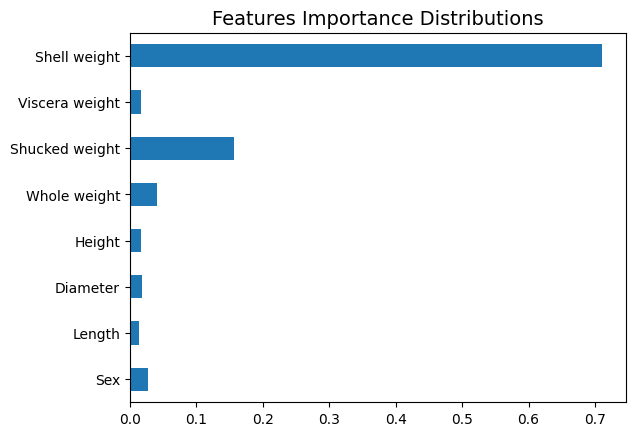

In [54]:
features_imp.plot(kind='barh')
plt.title('Features Importance Distributions',fontsize=14)
plt.show()

In [55]:
input_data = [1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15]
print('Input Data:',input_data)
print()
input_data_scaled = scaler.transform([input_data])
print("Scaled User Data:",input_data_scaled)
print()
pred = new_rf_model.predict(input_data_scaled)[0]
print(f"Predicted Age is: {pred:.2f} Yr")

Input Data: [1, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.15]

Scaled User Data: [[0.5        0.51351351 0.5210084  0.0840708  0.18133522 0.15030262
  0.1323239  0.14798206]]

Predicted Age is: 10.01 Yr


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
